# Práctica 3: Regresión Lineal II.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
from sklearn import model_selection,linear_model,metrics
import matplotlib.pyplot as plt

## Descripción del conjunto de datos.

In [2]:
data_csv = pd.read_csv('./precio_casas.csv', sep = ';')
df = data_csv.to_numpy()

### Ejercicio 1.  Análisis de dependencia lineal mediante coeficientes de determinación.

In [3]:
y_true = df[:, -1].reshape(-1,1)
regresiones = []
r2s = []
for column in range(len(df[0])-1):
    x = df[:, column].reshape(-1,1)

    reg = linear_model.LinearRegression().fit(x, y_true)
    regresiones.append(reg)
    
    y_pred= reg.predict(x)

    r2 = metrics.r2_score(y_true, y_pred)
    r2s.append(r2)
    

In [4]:
datos = {'Característica': ['Ingresos', 'Mediana antigüedad', 'Num. hab. promedio', 'Num. dorm. promedio', 'Población', 
                            'Ocup. promedio', 'Latitud', 'Longitud'],
         'R2': r2s
}
table = pd.DataFrame(datos)
table

,Característica,R2
0,Ingresos,0.473447
1,Mediana antigüedad,0.011156
2,Num. hab. promedio,0.023088
3,Num. dorm. promedio,0.002181
4,Población,0.000608
5,Ocup. promedio,0.000563
6,Latitud,0.020782
7,Longitud,0.002113


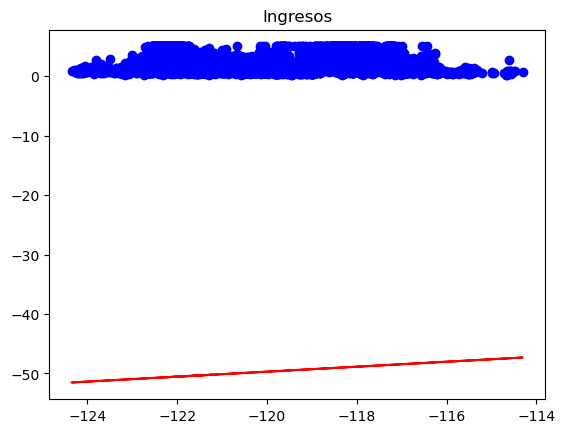

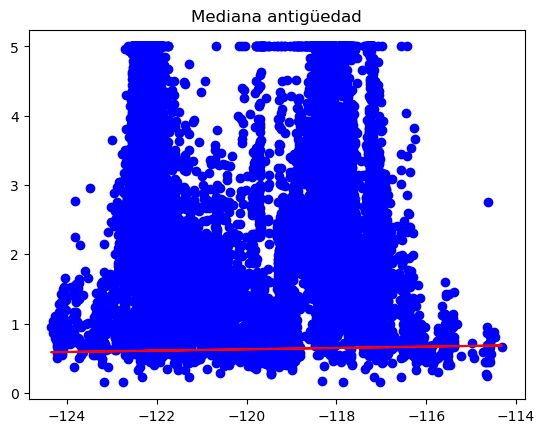

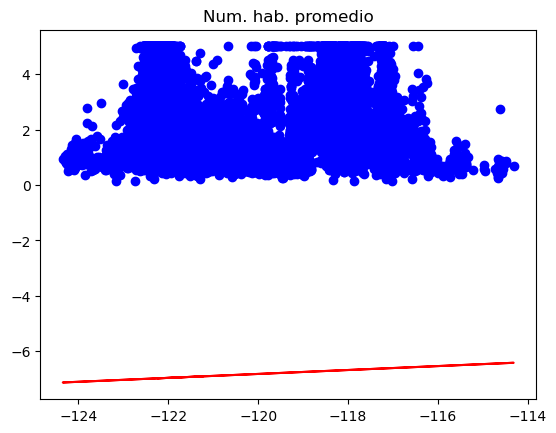

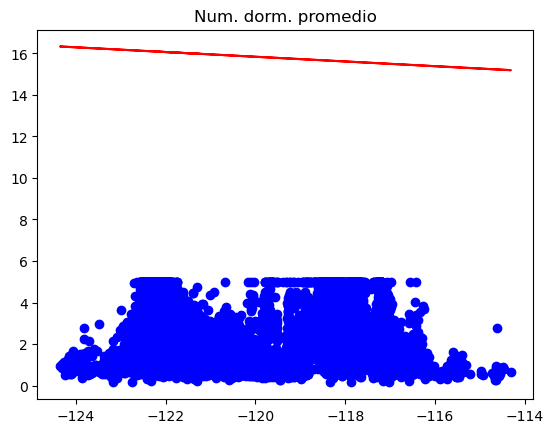

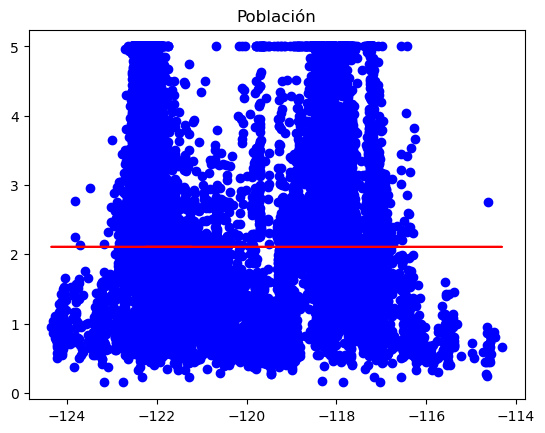

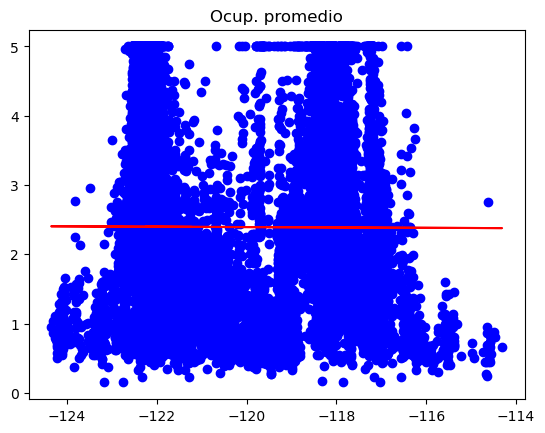

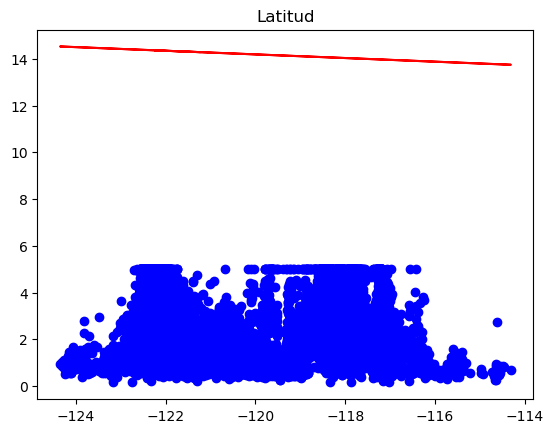

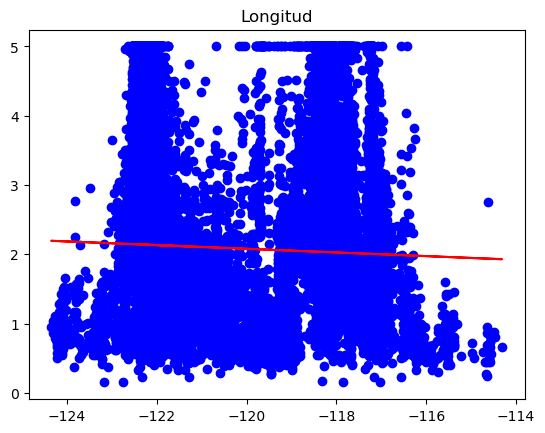

In [5]:
y_true = df[:, -1].reshape(-1,1)
caracteristicas = ['Ingresos', 'Mediana antigüedad', 'Num. hab. promedio', 'Num. dorm. promedio', 'Población', 
                            'Ocup. promedio', 'Latitud', 'Longitud']
for i in range(len(df[0])-1):
    x = df[:, column].reshape(-1,1)
    
    ax = plt.subplot(111)
    ax.scatter(x, y_true, color='blue')
    ax.plot(x, x * regresiones[i].coef_[0] + regresiones[i].intercept_, color='red')
    ax.set_title(caracteristicas[i])
    plt.show()

### Diagramas de dispersión.

### Ejercicio 2: Estimación por regresión lineal con diferente número de característica.

### División del conjunto de datos.

In [6]:
data_x = df[:, 0:len(df[0])-1]
data_y = df[:, len(df[0])-1:len(df[0])]

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

In [7]:
#Ingresos.
ing = x_train[:,0].reshape(-1,1)
ing_test = x_test[:,0].reshape(-1,1)

reg_ing = linear_model.LinearRegression().fit(ing, y_train)
y_pred = reg_ing.predict(ing_test)

error_ing = metrics.mean_squared_error(y_test, y_pred, squared = False)

In [8]:
#Ingresos y habitación.
train2 = x_train[:,[0,2]]
train2_test = x_test[:,[0,2]]

reg = linear_model.LinearRegression().fit(train2, y_train)
y_pred = reg.predict(train2_test)

error_train2 = metrics.mean_squared_error(y_test, y_pred, squared = False)

In [9]:
#Ingresos, habitaciones y dormitorios.
train3 = x_train[:,[0,2,3]]
train3_test = x_test[:,[0,2,3]]

reg = linear_model.LinearRegression().fit(train3, y_train)
y_pred = reg.predict(train3_test)

error_train3 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [10]:
#Ingresos, habitaciones, dormitorios y ocupantes.
train4 = x_train[:,[0,2,3,5]]
train4_test = x_test[:,[0,2,3,5]]

reg = linear_model.LinearRegression().fit(train4, y_train)
y_pred = reg.predict(train4_test)

error_train4 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [11]:
#Ingresos, habitaciones, dormitorios, ocupantes y antigüedad.
train5 = x_train[:,[0,2,3,5,1]]
train5_test = x_test[:,[0,2,3,5,1]]

reg = linear_model.LinearRegression().fit(train5, y_train)
y_pred = reg.predict(train5_test)

error_train5 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [12]:
#Ingresos, habitaciones, dormitorios, ocupantes, antigüedad y latitud.
train6 = x_train[:,[0,2,3,5,1,6]]
train6_test = x_test[:,[0,2,3,5,1,6]]

reg = linear_model.LinearRegression().fit(train6, y_train)
y_pred = reg.predict(train6_test)

error_train6 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [13]:
#Ingresos, habitaciones, dormitorios, ocupantes, antigüedad, latitud y longitud.
train7 = x_train[:,[0,2,3,5,1,6,7]]
train7_test = x_test[:,[0,2,3,5,1,6,7]]

reg = linear_model.LinearRegression().fit(train7, y_train)
y_pred = reg.predict(train7_test)

error_train7 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [14]:
#Ingresos, habitaciones, dormitorios, ocupantes, antigüedad, latitud, longitud y población.
train8 = x_train[:,[0,2,3,5,1,6,7,4]]
train8_test = x_test[:,[0,2,3,5,1,6,7,4]]

reg = linear_model.LinearRegression().fit(train8, y_train)
y_pred = reg.predict(train8_test)

error_train8 = metrics.mean_squared_error(y_test, y_pred, squared = False) 

In [15]:
columnas = ['Característica', 'RMSE']
datos = [['Ingresos', error_ing],
        ['Num. hab. promedio',error_train2],
        ['Num. dorm. promedio', error_train3],
        ['Ocup.promedio', error_train4],
        ['Mediana antigüedad', error_train5],
        ['Latitud', error_train6],
        ['Longitud', error_train7],
        ['Población', error_train8]]
table = pd.DataFrame(datos, columns = columnas)
table

,Característica,RMSE
0,Ingresos,0.831745
1,Num. hab. promedio,0.826216
2,Num. dorm. promedio,0.808086
3,Ocup.promedio,0.807261
4,Mediana antigüedad,0.785151
5,Latitud,0.781779
6,Longitud,0.728408
7,Población,0.728391
